In [1]:
import matplotlib.pyplot as plt
import pandas

# Ladataan data
Eduskuntavaalien 2019 anonymisoitu vaalikonedata.
Lähde: [YLE](https://yle.fi/uutiset/3-10725384)

In [4]:
df = pandas.read_csv('Avoin_data_eduskuntavaalit_2019_valintatiedot.csv')
print('Data sisältää {rows} riviä ja {cols} kolumnia.'.format(rows=df.shape[0], cols=df.shape[1]))
df.head()

Data sisältää 2437 riviä ja 212 kolumnia.


,vaalipiiri,puolue,"Valintatieto (0=ei valita, 1=valitaan, 2=varalla)","Suomen pitää olla edelläkävijä ilmastonmuutoksen vastaisessa taistelussa, vaikka se aiheuttaisi suomalaisille kustannuksia.",Suomen ei pidä kiirehtiä kieltämään uusien bensa- ja dieselautojen myyntiä.,Valtion pitää ohjata suomalaiset syömään vähemmän lihaa esimerkiksi verotuksen avulla.,Metsiä hakataan Suomessa liikaa.,"Kun valtion menoja ja tuloja tasapainotetaan, se on tehtävä mieluummin menoja karsimalla kuin veroja kiristämällä.","Sosiaaliturvaa tulee kehittää niin, että osa nykyisistä tuista korvataan kaikille työikäisille maksettavalla, vastikkeettomalla perustulolla.",Euron ulkopuolella Suomi pärjäisi paremmin.,...,Lappi. Lappiin ei saa avata yhtään uutta kaivosta ennen kuin yhtiöiltä aletaan periä kaivosveroa.,Lappi. Mahdollisen uuden maakuntahallinnon toimintoja ja työpaikkoja on sijoitettava muuallekin kuin Rovaniemelle.,Lappi. Lapin erikoissairaanhoito on keskitettävä kokonaan Rovaniemelle Lapin keskussairaalaan.,Lappi. Alkuperäiskansojen oikeuksia koskeva ILO-sopimus pitää ratifioida seuraavalla hallituskaudella.,Lappi. Jäämeren rata pitää rakentaa.,Lappi. Lappiin ei saa avata yhtään uutta kaivosta ennen kuin yhtiöiltä aletaan periä kaivosveroa..1,Lappi. Mahdollisen uuden maakuntahallinnon toimintoja ja työpaikkoja on sijoitettava muuallekin kuin Rovaniemelle..1,Lappi. Lapin erikoissairaanhoito on keskitettävä kokonaan Rovaniemelle Lapin keskussairaalaan..1,Lappi. Alkuperäiskansojen oikeuksia koskeva ILO-sopimus pitää ratifioida seuraavalla hallituskaudella. .1,Lappi. Jäämeren rata pitää rakentaa..1
0,Uudenmaan vaalipiiri,Kokoomus,0,2,4,4,1,5,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Uudenmaan vaalipiiri,Suomen Kommunistinen Puolue,0,5,NaN,4,5,1,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Uudenmaan vaalipiiri,Perussuomalaiset,0,1,5,1,2,5,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uudenmaan vaalipiiri,Perussuomalaiset,0,1,5,1,1,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Uudenmaan vaalipiiri,Perussuomalaiset,1,1,5,1,2,5,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.groupby(['vaalipiiri'])['Euron ulkopuolella Suomi pärjäisi paremmin.'].mean()

DataError: No numeric types to aggregate

Muutetaan kolumnien datatyypit numeroiksi.

In [13]:
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: None if x == '-' else float(x))
    except ValueError:
        continue

Tehdään pari nopeaa laskutoimitusta.

In [7]:
df.groupby(['vaalipiiri'])['Euron ulkopuolella Suomi pärjäisi paremmin.'].mean()

vaalipiiri
Ahvenanmaan maakunnan vaalipiiri    1.800000
Helsingin vaalipiiri                2.421260
Hämeen vaalipiiri                   2.385185
Kaakkois-Suomen vaalipiiri          2.414634
Keski-Suomen vaalipiiri             2.546099
Lapin vaalipiiri                    2.362745
Oulun vaalipiiri                    2.635294
Pirkanmaan vaalipiiri               2.557940
Satakunnan vaalipiiri               2.490196
Savo-Karjalan vaalipiiri            2.453947
Uudenmaan vaalipiiri                2.521158
Vaasan vaalipiiri                   2.432258
Varsinais-Suomen vaalipiiri         2.274854
Name: Euron ulkopuolella Suomi pärjäisi paremmin., dtype: float64

In [8]:
df.groupby(['puolue'])['Euron ulkopuolella Suomi pärjäisi paremmin.'].mean().sort_values(ascending=False)

puolue
Kansanliike Suomen Puolesta    5.000000
Kommunistinen Työväenpuolue    5.000000
Suomen Kansa Ensin             4.709677
Seitsemän tähden liike         4.589928
Itsenäisyyspuolue              4.475000
Suomen Kommunistinen Puolue    4.363636
Kansalaispuolue                4.250000
Perussuomalaiset               4.166667
Sitoutumaton                   3.388889
Sininen tulevaisuus            2.558559
Kristillisdemokraatit          2.427746
Vasemmistoliitto               2.275000
Eläinoikeuspuolue              2.176471
Liberaalipuolue                2.083333
Feministinen puolue            1.972222
Keskusta                       1.938389
Piraattipuolue                 1.931507
Liike Nyt                      1.762376
SDP                            1.463415
Kokoomus                       1.451923
Vihreät                        1.445498
RKP                            1.288660
Name: Euron ulkopuolella Suomi pärjäisi paremmin., dtype: float64

Rajataan data vain yhteen vaalipiiriin.

In [9]:
uusimaa = df[df['vaalipiiri'] == 'Uudenmaan vaalipiiri']
uusimaa.head()

,vaalipiiri,puolue,"Valintatieto (0=ei valita, 1=valitaan, 2=varalla)","Suomen pitää olla edelläkävijä ilmastonmuutoksen vastaisessa taistelussa, vaikka se aiheuttaisi suomalaisille kustannuksia.",Suomen ei pidä kiirehtiä kieltämään uusien bensa- ja dieselautojen myyntiä.,Valtion pitää ohjata suomalaiset syömään vähemmän lihaa esimerkiksi verotuksen avulla.,Metsiä hakataan Suomessa liikaa.,"Kun valtion menoja ja tuloja tasapainotetaan, se on tehtävä mieluummin menoja karsimalla kuin veroja kiristämällä.","Sosiaaliturvaa tulee kehittää niin, että osa nykyisistä tuista korvataan kaikille työikäisille maksettavalla, vastikkeettomalla perustulolla.",Euron ulkopuolella Suomi pärjäisi paremmin.,...,Lappi. Lappiin ei saa avata yhtään uutta kaivosta ennen kuin yhtiöiltä aletaan periä kaivosveroa.,Lappi. Mahdollisen uuden maakuntahallinnon toimintoja ja työpaikkoja on sijoitettava muuallekin kuin Rovaniemelle.,Lappi. Lapin erikoissairaanhoito on keskitettävä kokonaan Rovaniemelle Lapin keskussairaalaan.,Lappi. Alkuperäiskansojen oikeuksia koskeva ILO-sopimus pitää ratifioida seuraavalla hallituskaudella.,Lappi. Jäämeren rata pitää rakentaa.,Lappi. Lappiin ei saa avata yhtään uutta kaivosta ennen kuin yhtiöiltä aletaan periä kaivosveroa..1,Lappi. Mahdollisen uuden maakuntahallinnon toimintoja ja työpaikkoja on sijoitettava muuallekin kuin Rovaniemelle..1,Lappi. Lapin erikoissairaanhoito on keskitettävä kokonaan Rovaniemelle Lapin keskussairaalaan..1,Lappi. Alkuperäiskansojen oikeuksia koskeva ILO-sopimus pitää ratifioida seuraavalla hallituskaudella. .1,Lappi. Jäämeren rata pitää rakentaa..1
0,Uudenmaan vaalipiiri,Kokoomus,0.0,2.0,4.0,4.0,1.0,5.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Uudenmaan vaalipiiri,Suomen Kommunistinen Puolue,0.0,5.0,NaN,4.0,5.0,1.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Uudenmaan vaalipiiri,Perussuomalaiset,0.0,1.0,5.0,1.0,2.0,5.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uudenmaan vaalipiiri,Perussuomalaiset,0.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Uudenmaan vaalipiiri,Perussuomalaiset,1.0,1.0,5.0,1.0,2.0,5.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
uusimaa.groupby(['puolue'])['Euron ulkopuolella Suomi pärjäisi paremmin.'].mean().sort_values(ascending=False)

puolue
Kommunistinen Työväenpuolue    5.000000
Suomen Kansa Ensin             4.571429
Seitsemän tähden liike         4.461538
Perussuomalaiset               4.314286
Suomen Kommunistinen Puolue    4.200000
Kansalaispuolue                4.000000
Itsenäisyyspuolue              3.750000
Sitoutumaton                   3.750000
Sininen tulevaisuus            3.000000
Vasemmistoliitto               2.735294
Kristillisdemokraatit          2.714286
Feministinen puolue            2.250000
Keskusta                       2.088235
Piraattipuolue                 2.062500
Liberaalipuolue                1.888889
Kokoomus                       1.638889
Liike Nyt                      1.625000
SDP                            1.558824
Vihreät                        1.555556
Eläinoikeuspuolue              1.333333
RKP                            1.250000
Name: Euron ulkopuolella Suomi pärjäisi paremmin., dtype: float64

In [15]:
uusimaa.groupby(['puolue'])['Euron ulkopuolella Suomi pärjäisi paremmin.'].mean().sort_values(ascending=False) -\
    df.groupby(['puolue'])['Euron ulkopuolella Suomi pärjäisi paremmin.'].mean().sort_values(ascending=False)

puolue
Eläinoikeuspuolue             -0.843137
Feministinen puolue            0.277778
Itsenäisyyspuolue             -0.725000
Kansalaispuolue               -0.250000
Kansanliike Suomen Puolesta         NaN
Keskusta                       0.149847
Kokoomus                       0.186966
Kommunistinen Työväenpuolue    0.000000
Kristillisdemokraatit          0.286540
Liberaalipuolue               -0.194444
Liike Nyt                     -0.137376
Perussuomalaiset               0.147619
Piraattipuolue                 0.130993
RKP                           -0.038660
SDP                            0.095409
Seitsemän tähden liike        -0.128390
Sininen tulevaisuus            0.441441
Sitoutumaton                   0.361111
Suomen Kansa Ensin            -0.138249
Suomen Kommunistinen Puolue   -0.163636
Vasemmistoliitto               0.460294
Vihreät                        0.110058
Name: Euron ulkopuolella Suomi pärjäisi paremmin., dtype: float64

In [14]:
df.mean().head(10)

Valintatieto (0=ei valita, 1=valitaan, 2=varalla)                                                                                                0.145261
Suomen pitää olla edelläkävijä ilmastonmuutoksen vastaisessa taistelussa, vaikka se aiheuttaisi suomalaisille kustannuksia.                      3.436114
Suomen ei pidä kiirehtiä kieltämään uusien bensa- ja dieselautojen myyntiä.                                                                      3.837778
Valtion pitää ohjata suomalaiset syömään vähemmän lihaa esimerkiksi verotuksen avulla.                                                           2.533955
Metsiä hakataan Suomessa liikaa.                                                                                                                 2.641450
Kun valtion menoja ja tuloja tasapainotetaan, se on tehtävä mieluummin menoja karsimalla kuin veroja kiristämällä.                               3.219566
Sosiaaliturvaa tulee kehittää niin, että osa nykyisistä tuista korvataan kai

In [16]:
groupcol = ['puolue', 'Valintatieto (0=ei valita, 1=valitaan, 2=varalla)']
df[[col for col in df.columns if 'Uusimaa' in col] + groupcol].groupby(groupcol).mean()

Uusimaa. Kaatolupia on myönnettävä nykyistä enemmän susikannan rajoittamiseksi.  \
puolue                      Valintatieto (0=ei valita, 1=valitaan, 2=varalla)                                                                                    
Eläinoikeuspuolue           0.0                                                                                         1.000000                                 
Feministinen puolue         0.0                                                                                         1.750000                                 
Itsenäisyyspuolue           0.0                                                                                         1.692308                                 
Kansalaispuolue             0.0                                                                                         2.750000                                 
Kansanliike Suomen Puolesta 0.0                                                                                              NaN                                 
Keskusta                    0.0                                                                                         3.161290                                 
                            1.0                                                                                         4.000000                                 
                            2.0                                                                                         5.000000                                 
Kokoomus                    0.0                                                                                         2.769231                                 
                            1.0                                                                                         3.000000                                 
                            2.0                                                                                         5.000000                                 
Kommunistinen Työväenpuolue 0.0                                                                                         1.333333                                 
Kristillisdemokraatit       0.0                                                                                         3.366667                                 
                            1.0                                                                                         4.000000                                 
                            2.0                                                                                         2.000000                                 
Liberaalipuolue             0.0                                                                                         1.833333                                 
Liike Nyt                   0.0                                                                                         2.409091                                 
                            1.0                                                                                         4.000000                                 
                            2.0                                                                                         4.000000                                 
Perussuomalaiset            0.0                                                                                         3.137931                                 
                            1.0                                                                                         3.333333                                 
                            2.0                                                                                         5.000000                                 
Piraattipuolue              0.0                                                                                         2.133333                                 
RKP                         0

Rajataan data vain koko maata koskeviin kysymyksiin.

In [35]:
datacols = df.columns[0:32].tolist() + ['Sukupuolesi', 'Koulutuksesi']
datacols = datacols[:2] + datacols[-2: ] + datacols[2:-2]
data = df[datacols]
data.head()

,vaalipiiri,puolue,Sukupuolesi,Koulutuksesi,"Valintatieto (0=ei valita, 1=valitaan, 2=varalla)","Suomen pitää olla edelläkävijä ilmastonmuutoksen vastaisessa taistelussa, vaikka se aiheuttaisi suomalaisille kustannuksia.",Suomen ei pidä kiirehtiä kieltämään uusien bensa- ja dieselautojen myyntiä.,Valtion pitää ohjata suomalaiset syömään vähemmän lihaa esimerkiksi verotuksen avulla.,Metsiä hakataan Suomessa liikaa.,"Kun valtion menoja ja tuloja tasapainotetaan, se on tehtävä mieluummin menoja karsimalla kuin veroja kiristämällä.",...,Sosiaali- ja terveyspalveluiden rahoittaminen vaatii työperäisen maahanmuuton merkittävää lisäämistä.,Nato-jäsenyys vahvistaisi Suomen turvallisuuspoliittista asemaa.,Vihapuhe tulee määritellä ja asettaa rangaistavaksi rikoslaissa.,Perinteiset arvot ovat hyvän elämän perusta.,Suomessa tarvitaan nyt koviakin keinoja järjestyksen ja tavallisten ihmisten puolustamiseksi.,"On oikein, että yhteiskunnassa jotkut ryhmät ovat paremmassa asemassa kuin toiset.",Suomen lakien pitäisi nykyistä vapaammin antaa ihmisten tehdä omat ratkaisunsa ja kantaa niiden seuraukset.,Poliitikon velvollisuus on ennen kaikkea ajaa omien äänestäjiensä etuja.,"On olemassa pyhiä tai muuten yksilöä suurempia asioita, joita täytyy puolustaa silloinkin, kun se vaatii omien etujen uhraamista.","On oikein nähdä vaivaa sen eteen, ettei vahingossakaan loukkaa toista."
0,Uudenmaan vaalipiiri,Kokoomus,Nainen,korkeakoulututkinto,0.0,2.0,4.0,4.0,1.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0
1,Uudenmaan vaalipiiri,Suomen Kommunistinen Puolue,Mies,korkeakoulututkinto,0.0,5.0,NaN,4.0,5.0,1.0,...,2.0,1.0,4.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0
2,Uudenmaan vaalipiiri,Perussuomalaiset,Mies,ammattitutkinto,0.0,1.0,5.0,1.0,2.0,5.0,...,1.0,2.0,1.0,5.0,2.0,4.0,4.0,5.0,4.0,2.0
3,Uudenmaan vaalipiiri,Perussuomalaiset,Mies,ammattitutkinto,0.0,1.0,5.0,1.0,1.0,1.0,...,1.0,2.0,1.0,5.0,5.0,2.0,2.0,4.0,4.0,2.0
4,Uudenmaan vaalipiiri,Perussuomalaiset,Nainen,ylioppilas,1.0,1.0,5.0,1.0,2.0,5.0,...,1.0,1.0,1.0,5.0,5.0,4.0,4.0,5.0,5.0,2.0


Tehdään yksinkertainen PCA visualisointia varten.

Aluksi, standardoidaan data (yksikkö varianssi, nolla keskiarvo).

In [36]:
from sklearn.preprocessing import StandardScaler

features = data.columns[5:].tolist()
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pcomp = pca.fit_transform(x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Täytetään tyhjät arvot kolumnin keskiarvolla.

In [74]:
data = data.fillna(data.mean())
x = data.loc[:, features].values
scaled = StandardScaler().fit_transform(x)
n_components = 4
pca = PCA(n_components=n_components)

pcomp = pca.fit_transform(scaled)
principaldf = pandas.DataFrame(data = pcomp, columns = ['pc{n}'.format(n=i+1) for i in range(n_components)])
print(pca.explained_variance_ratio_.sum())

0.4860557637806831


In [86]:
explained = pandas.DataFrame(pca.components_, columns=features,
                             index =['pc{n}'.format(n=i+1) for i in range(n_components)]).transpose()
explained.sort_values('pc1')

,pc1,pc2,pc3,pc4
Maahanmuuttajien määrän kasvu on lisännyt turvattomuutta Suomessa.,-0.296425,-0.066489,-0.014929,-0.076461
Suomen ei pidä kiirehtiä kieltämään uusien bensa- ja dieselautojen myyntiä.,-0.284632,-0.063342,-0.029389,-0.100116
Perinteiset arvot ovat hyvän elämän perusta.,-0.264245,-0.137546,-0.167781,-0.072409
Suomessa tarvitaan nyt koviakin keinoja järjestyksen ja tavallisten ihmisten puolustamiseksi.,-0.249554,-0.073266,-0.008896,-0.216042
"Kun valtion menoja ja tuloja tasapainotetaan, se on tehtävä mieluummin menoja karsimalla kuin veroja kiristämällä.",-0.243610,0.199394,-0.078057,-0.056193
"On oikein, että yhteiskunnassa jotkut ryhmät ovat paremmassa asemassa kuin toiset.",-0.154669,0.189361,-0.039426,0.004865
Euron ulkopuolella Suomi pärjäisi paremmin.,-0.152262,-0.210077,0.326670,0.116609
Poliitikon velvollisuus on ennen kaikkea ajaa omien äänestäjiensä etuja.,-0.124608,-0.104708,0.110288,-0.279832
Suomen lakien pitäisi nykyistä vapaammin antaa ihmisten tehdä omat ratkaisunsa ja kantaa niiden seuraukset.,-0.117049,0.277707,0.217022,-0.074534
Viinit ja vahvat oluet pitää saada ruokakauppoihin.,-0.105978,0.276231,0.208815,-0.343914


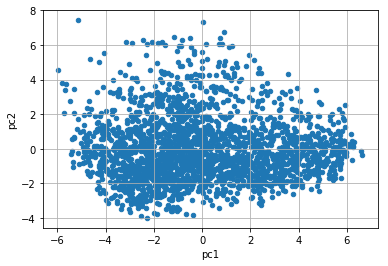

In [72]:
principaldf.plot(kind='scatter', x='pc1', y='pc2', grid=True)
plt.show()

In [73]:
pca_df = data[data.columns[:4]].merge(principaldf, left_index=True, right_index=True)
pca_df.head()

,vaalipiiri,puolue,Sukupuolesi,Koulutuksesi,pc1,pc2,pc3,pc4
0,Uudenmaan vaalipiiri,Kokoomus,Nainen,korkeakoulututkinto,-1.564292,0.972629,-1.806752,-1.385355
1,Uudenmaan vaalipiiri,Suomen Kommunistinen Puolue,Mies,korkeakoulututkinto,3.883465,-1.116859,2.220629,0.603252
2,Uudenmaan vaalipiiri,Perussuomalaiset,Mies,ammattitutkinto,-4.714464,-0.522944,2.246953,1.252769
3,Uudenmaan vaalipiiri,Perussuomalaiset,Mies,ammattitutkinto,-4.176539,-0.688230,1.238142,-0.106981
4,Uudenmaan vaalipiiri,Perussuomalaiset,Nainen,ylioppilas,-4.722914,-1.440267,1.793302,-0.658491


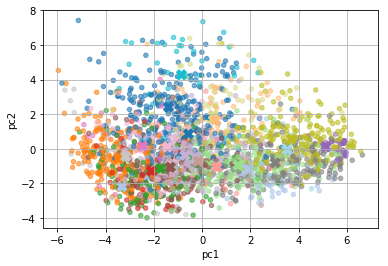

In [134]:
import seaborn as sns
col = 'puolue'
# Unique category labels: 'D', 'F', 'G', ...
color_labels = pca_df[col].unique()

# List of RGB triplets
rgb_values = sns.color_palette("tab20", pca_df[col].nunique())

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

ax = pca_df.plot(kind='scatter', x='pc1', y='pc2', c=df[col].map(color_map), grid=True, alpha=0.6)
grouped = pca_df.groupby(col)[['pc1', 'pc2']].mean()
grouped.plot(kind='scatter', ax=ax, x='pc1', y='pc2', c=grouped.index.map(color_map), grid=True, marker='X', s=100)
plt.show()

Kuva voisi olla interaktiivinen.

Aja komentorivillä: jupyter nbextension enable --py widgetsnbextension

In [99]:
import ipywidgets as widgets
from ipywidgets import interactive, interact_manual

from IPython.display import display

In [146]:
plot_output = widgets.Output()
puolueet = pca_df['puolue'].unique().tolist()
puolueet.sort()
vaalipiirit = pca_df['vaalipiiri'].unique().tolist()
sukupuolet = pca_df['Sukupuolesi'].unique().tolist()
koulutukset = pca_df['Koulutuksesi'].unique().tolist()

puolue_widget = widgets.SelectMultiple(
    options=puolueet,
    description='Puolueet',
    disabled=False
)
vaalipiiri_widget = widgets.SelectMultiple(
    options=vaalipiirit,
    description='Vaalipiirit',
    disabled=False
)
sukupuoli_widget = widgets.SelectMultiple(
    options=sukupuolet,
    description='Sukupuoli',
    disabled=False
)
koulutus_widget = widgets.SelectMultiple(
    options=koulutukset,
    description='Koulutus',
    disabled=False
)
visualize_column_widget = widgets.Dropdown(
    options=['puolue', 'vaalipiiri', 'Sukupuolesi', 'Koulutuksesi'],
    default='puolue',
    description='Visualisoi kolumnin mukaan',
    disabled=False
)

def puolue_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value,
                     bounded_num.value)
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, 
                     bounded_num.value)

def create_colormap(data, col):
    # Unique category labels: 'D', 'F', 'G', ...
    color_labels = data[col].unique()
    # List of RGB triplets
    rgb_values = sns.color_palette("tab20", data[col].nunique())
    # Map label to RGB
    color_map = dict(zip(color_labels, rgb_values))
    return color_map

    
def visualize_data(puolue, vaalipiiri, sukupuoli, koulutus, visualisoi):
    color_maps = {
        'puolue': create_colormap(pca_df, 'puolue'),
        'vaalipiiri': create_colormap(pca_df, 'vaalipiiri'),
        'Sukupuolesi': create_colormap(pca_df, 'Sukupuolesi'),
        'Koulutuksesi': create_colormap(pca_df, 'Koulutuksesi')
    }
    plot_output.clear_output()
    filtered = pca_df
    if puolue:
        filtered = filtered[filtered['puolue'].isin(puolue)]
    if vaalipiiri:
        filtered = filtered[filtered['vaalipiiri'].isin(vaalipiiri)]
    if sukupuoli:
        filtered = filtered[filtered['Sukupuolesi'].isin(sukupuoli)]
    if koulutus:
        filtered = filtered[filtered['Koulutuksesi'].isin(koulutus)]
    with plot_output:
        grouped = filtered.groupby(visualisoi)[['pc1', 'pc2']].mean()
        ax = filtered.plot(kind='scatter', x='pc1', y='pc2', c=filtered[visualisoi].map(color_maps[visualisoi]), grid=True,
                           legend=True, xlim=[-7, 7], ylim=[-4.5, 8])
        grouped.plot(kind='scatter', ax=ax, x='pc1', y='pc2', c=grouped.index.map(color_maps[visualisoi]), grid=True, marker='X', s=400)
        plt.show()

w = interactive(visualize_data, puolue=puolue_widget, vaalipiiri=vaalipiiri_widget,
                sukupuoli=sukupuoli_widget, koulutus=koulutus_widget,
                visualisoi=visualize_column_widget)
row1 = widgets.HBox([puolue_widget, vaalipiiri_widget])
row2 = widgets.HBox([sukupuoli_widget, koulutus_widget])
display(widgets.VBox([row1, row2, visualize_column_widget, plot_output]))